# Breast cancer mortality and survival prediction

#  Mortality Status ensemble classifier with its base learners’ performances and Survival Months regression Decision Trees, with their graphical representation and performances

This notebook contains both the code and output cells of **Data Understanding and preparation** for the given Breast Cancer patients' dataset.

Author: Anshaff Ameer - 20230009 - w2084766

Peer Reviewed by: Pamudu Dilakwin Wijesingha

Tutors: Ms.Suvetha Suvendran and Ms.Uthpala Sooriya Arachchi




leveraged and reused code from code reuse session 01:

```
import pandas as pd
data = pd.read_csv('/DataFilePath/DataFileName.csv')

```



In [213]:
#importing pandas library
import pandas as pd
#loading the CW dataset into a variable "data_frame"
data_frame = pd.read_csv("/content/drive/MyDrive/IIT/Level 5/Mechine Learning/Course Work/prepared_classification_dataset.csv")
data_frame.head(10)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68,0,0,0,0,1,3,1,4.0,1,1,24,1,0
1,50,0,1,1,2,0,2,1,35.0,1,1,14,5,0
2,58,0,2,2,4,0,2,1,63.0,1,1,14,7,0
3,58,0,0,0,0,1,3,1,18.0,1,1,2,1,0
4,47,0,1,0,1,1,3,1,41.0,1,1,3,1,0
5,51,0,0,0,0,0,2,1,20.0,1,1,18,2,0
6,51,0,0,0,0,3,1,1,8.0,1,1,11,1,0
7,40,0,1,0,1,0,2,1,30.0,1,1,9,1,1
8,40,0,3,2,4,1,3,1,103.0,1,1,20,18,0
9,69,0,3,2,4,3,1,0,32.0,1,1,21,12,0


# **Logistic regression model**

In [214]:
#split dataset in features and target variable
feature_columns = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                   'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
X = data_frame[feature_columns] # Features
y = data_frame['Mortality_Status'] # Target variable

#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print('Whole Data shape', data_frame.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)


Whole Data shape (4002, 14)
X_train shape (2801, 13)
X_test shape (1201, 13)


In [215]:
#scale the columns
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print(X)

           Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  \
0     1.558496    0        0        0          0               1      3   
1    -0.446537    0        1        1          2               0      2   
2     0.444589    0        2        2          4               0      2   
3     0.444589    0        0        0          0               1      3   
4    -0.780709    0        1        0          1               1      3   
...        ...  ...      ...      ...        ...             ...    ...   
3997  0.890152    0        0        0          0               0      2   
3998  0.221807    0        1        1          2               0      2   
3999  1.558496    1        1        0          1               0      2   
4000  0.444589    0        1        0          1               0      2   
4001 -0.892100    0        1        0          1               0      2   

      A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  \
0           1   -1.259080       

<ipython-input-215-c608414ecde5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
learnable Parameters {'C': 1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1017
           1       0.29      0.60      0.40       184

    accuracy                           0.72      1201
   macro avg       0.60      0.67      0.61      1201
weighted avg       0.82      0.72      0.75      1201


Confusion Matrix:



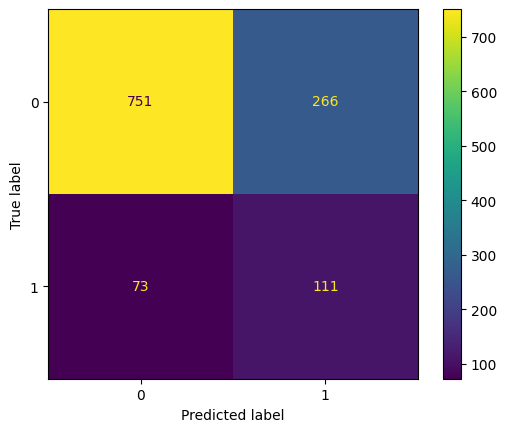

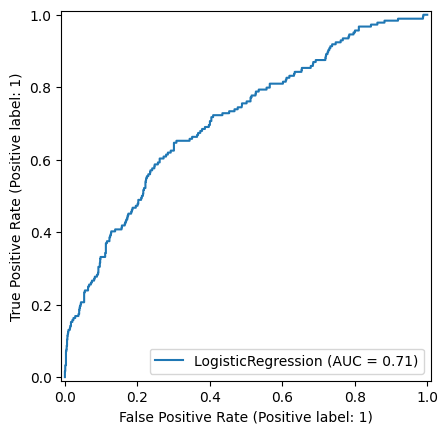

In [216]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid ={
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
    }
lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("learnable Parameters", best_lr.get_params())
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
# Create confusion matrix
cm_lr = confusion_matrix(y_test, y_pred, labels=best_lr.classes_)
# Display the confusion matrix
disp_lr_cm = ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels=best_lr.classes_)
disp_lr_cm.plot()
RocCurveDisplay.from_estimator(best_lr, X_test, y_test)

# **Naive Bayes Model**

leveraged and reused code from code reuse session 2:
```
from sklearn.model_selection import GridSearchCV

param_grid = {'hyperparameter1': values, 'hyperparameter2': values, hyperparameter3': values, ...}

AlgorithmName_gscv = GridSearchCV(AlgorithmName, param_grid, cv = value)

AlgorithmName_gscv.fit(X, y)

AlgorithmName_gscv.best_params_

```



Best Parameters: {'var_smoothing': 1e-06}

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1017
           1       0.31      0.41      0.35       184

    accuracy                           0.77      1201
   macro avg       0.60      0.62      0.61      1201
weighted avg       0.80      0.77      0.78      1201



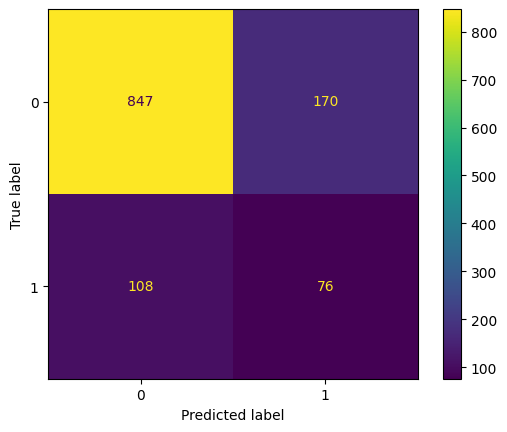

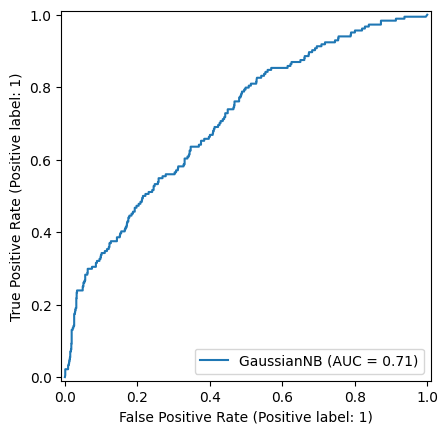

In [217]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

gnb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

#GridSearchCV for hyperparameter tuning
grid = GridSearchCV(gnb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

#Best model and prediction
best_gnb = grid.best_estimator_
y_pred = best_gnb.predict(X_test)
y_prob = best_gnb.predict_proba(X_test)[:, 1]

#Evaluation
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_gnb.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gnb.classes_)
disp_cm.plot()

#ROC Curve
RocCurveDisplay.from_estimator(best_gnb, X_test, y_test)

# **Ensemble Classifier**


leveraged and reused code from code reuse session 2:
```
from sklearn.ensemble import VotingClassifier
base_learners=[('Algorithm1', Algorithm1), ('Algorithm2', Algorithm2)]
ensemble_learner = VotingClassifier(base_learners, voting='soft')
ensemble_learner.fit(X_train, y_train)
 y_pred_ensemble_learner = ensemble_learner.predict(X_test)
 from sklearn.metrics import accuracy_score
ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)
print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)


```



The voting ensemble classifier accuracy is:  0.7676935886761033
Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1017
           1       0.32      0.45      0.37       184

    accuracy                           0.77      1201
   macro avg       0.60      0.64      0.61      1201
weighted avg       0.80      0.77      0.78      1201

confusion_matrix for ensember learner


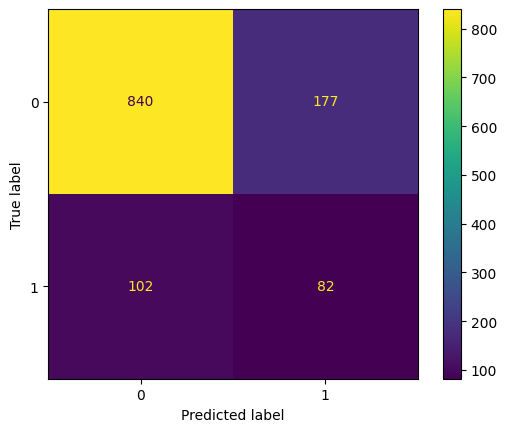

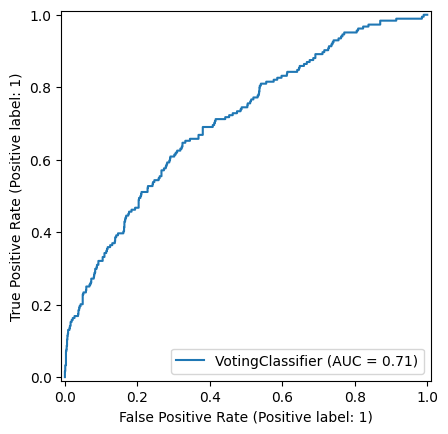

In [218]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#initiate a new ensemble model
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('NB', best_gnb), ('LR', best_lr)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='soft')

#fit model to training data
ensemble_learner = ensemble_learner.fit(X_train, y_train)
y_pred_ensembler = ensemble_learner.predict(X_test)


ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensembler)
print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)


# Evaluate your ensemble model by generating the classification report and the confusion matrix
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_ensembler))



print("confusion_matrix for ensember learner")
ensemble_learner_cm=confusion_matrix(y_test,y_pred_ensembler)
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = ensemble_learner.classes_)
disp.plot()
RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)

# **Decision Tree Model**

In [219]:
import pandas as pd
#loading the CW dataset into a variable "data_frame"
df = pd.read_csv("/content/drive/MyDrive/IIT/Level 5/Mechine Learning/Course Work/prepared_regression_dataset.csv")
df.head(10)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
0,40,0,1,0,1,0,2,1,30.0,1,1,9,1,14
1,68,0,0,0,0,0,2,1,13.0,1,1,9,1,64
2,57,0,2,2,4,0,2,1,70.0,1,1,12,12,42
3,42,0,0,2,4,0,2,1,9.0,0,0,15,2,39
4,67,0,0,0,0,0,2,1,13.0,1,1,16,3,60
5,31,0,2,2,4,1,3,1,70.0,1,1,23,23,44
6,64,0,1,2,4,1,3,1,34.0,1,0,24,20,12
7,53,0,2,0,2,1,3,1,60.0,1,1,8,1,91
8,63,0,1,1,2,3,1,1,26.0,1,1,5,4,87
9,45,0,1,2,4,1,3,1,25.0,1,1,21,16,40


In [220]:
list(df.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [221]:
df.shape

(614, 14)

leveraged and reused code from code reuse session 01:

```
X = dataset.drop('Target Variable', axis=1)

y = dataset['Target Variable']
```



In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
X1 = df.drop('Survival_Months', axis=1)
y1 = df['Survival_Months']

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42)
print('Whole Data shape', df.shape)
print('X_train shape', X1_train.shape)
print('X_test shape', X1_test.shape)


Whole Data shape (614, 14)
X_train shape (429, 13)
X_test shape (185, 13)


leveraged and reused code from code reuse session 01:

```
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from matplotlib import pyplot as plt

DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)
y_pred = DT_regressor.predict(X_test)
Tree_figure = plt.figure(figsize=(200,200))
DT_Graph = tree.plot_tree(DT_regressor, feature_names=list(X_train.columns), filled=True)
Tree_figure.savefig("decistion_tree.svg")
```



In [223]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from matplotlib import pyplot as plt
# Build a fully grown decision tree clf
clf = DecisionTreeRegressor()
clf.fit(X1_train, y1_train)

#To make predictions on the test set, ues the predict method:
y_pred_clf = clf.predict(X1_test)

print("The full Regression Decision Tree Levels: ", clf.tree_.max_depth)
#You can size your plot then plot the fully grown classification tree
Unpruned_Tree_figure = plt.figure(figsize=(100,100))
DT_Graph = tree.plot_tree(clf, feature_names=list(X1_train.columns),filled=True)
#save the tree
Unpruned_Tree_figure.savefig("/content/drive/MyDrive/IIT/Level 5/Mechine Learning/Course Work/fully_grown.svg")

The full Regression Decision Tree Levels:  21


leveraged and reused code from code reuse session 01:

```
 DT_regressor = DecisionTreeRegressor(max_depth=value)

DT_regressor.fit(X_train, y_train)

y_pred = DT_regressor.predict(X_test)
```



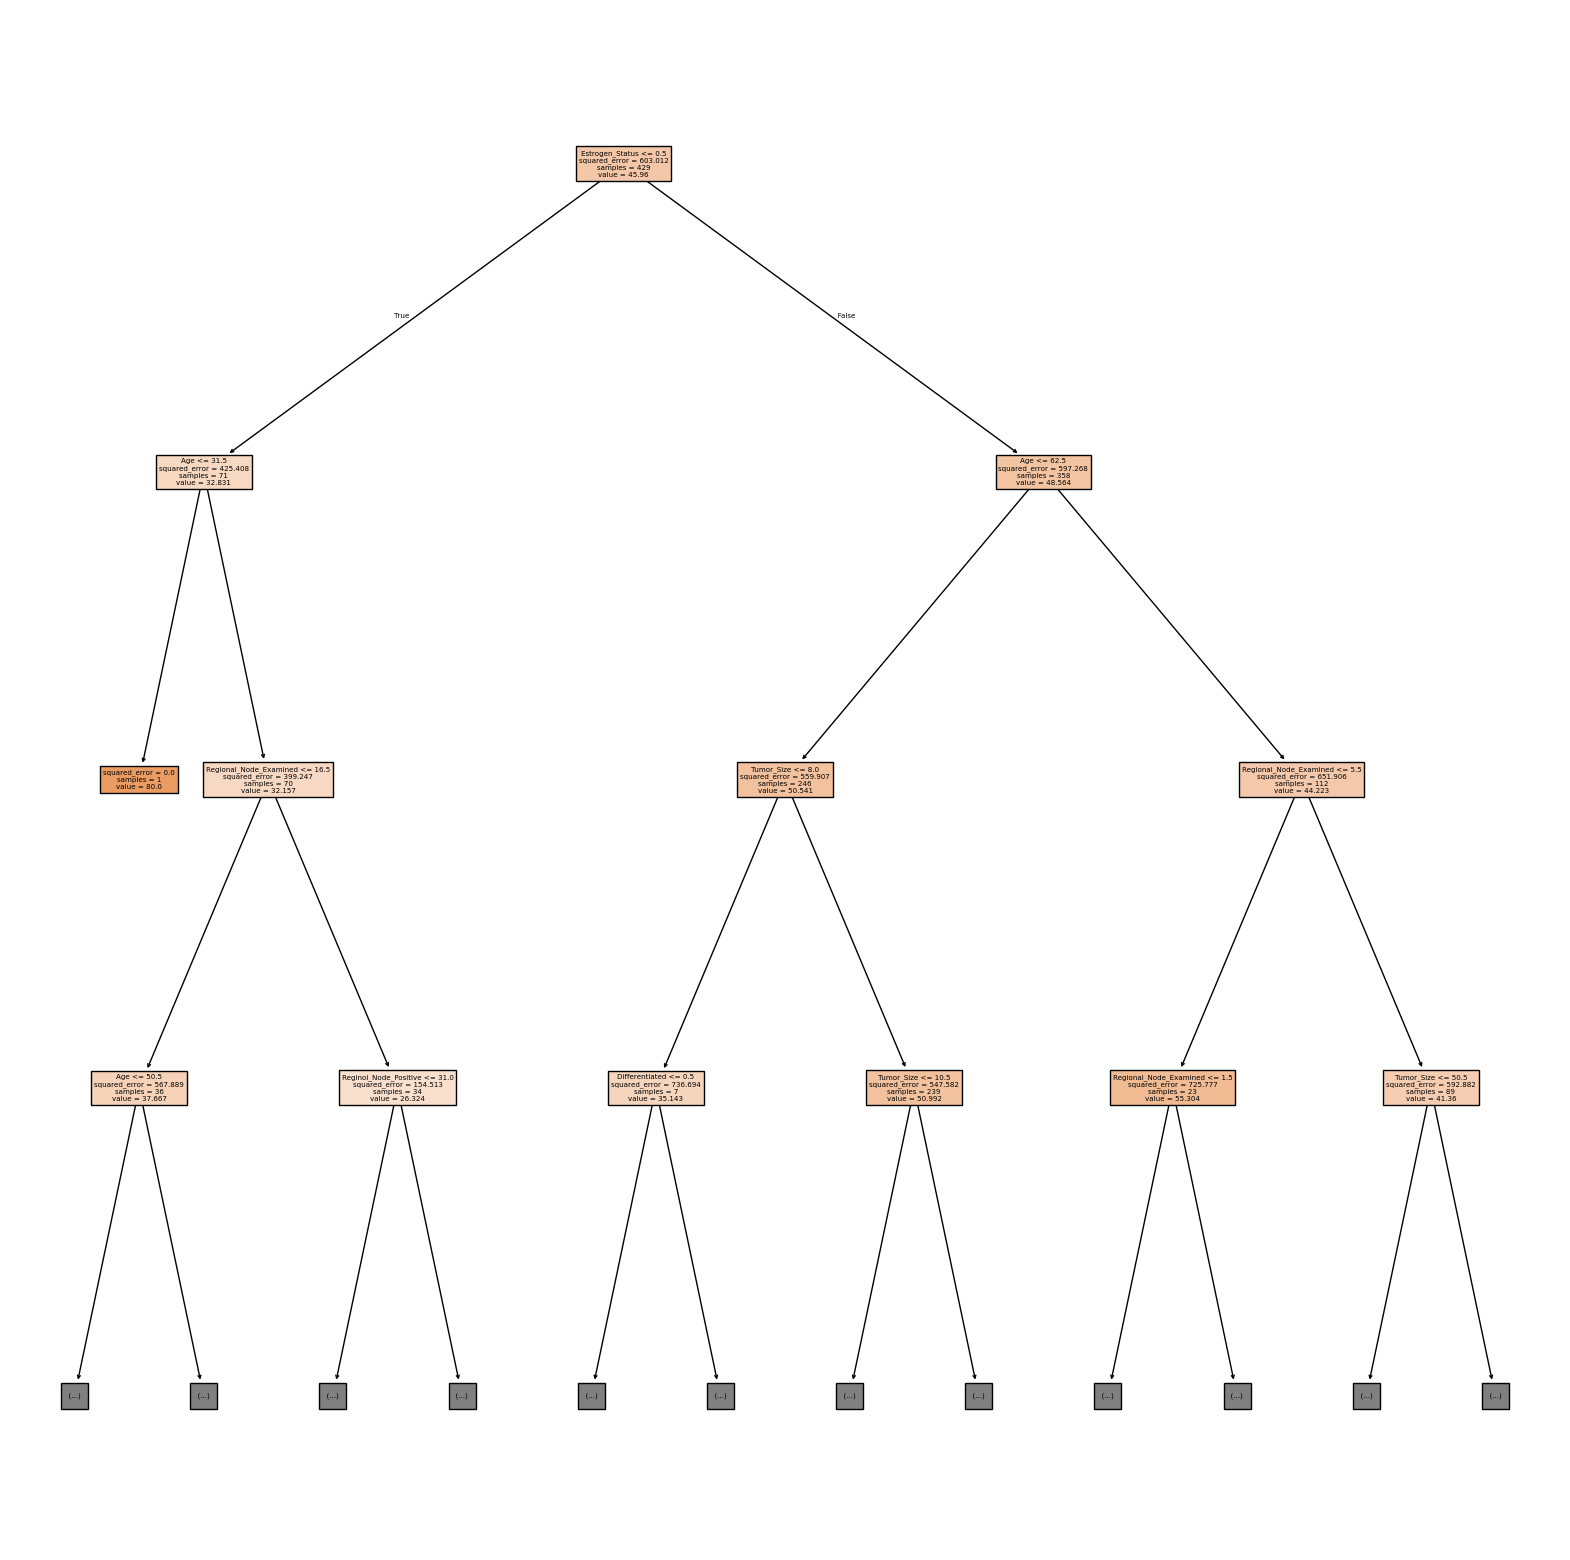

In [224]:
import matplotlib.pyplot as plt
from sklearn import tree
# Limit the tree growth to 4 levels
pruned_regressor = DecisionTreeRegressor(max_depth=4)
pruned_regressor.fit(X1_train, y1_train)

# To make predictions on the test set, ues the predict method:
y_pred_pruned = pruned_regressor.predict(X1_test)

# Plot the regression DT
Pruned_Tree_figure = plt.figure(figsize=(20,20))
Pruned_DT_Graph = tree.plot_tree(clf, feature_names=list(X1_train.columns), filled=True, max_depth=3)

#To save the DT graph as a png image
Pruned_Tree_figure.savefig("/content/drive/MyDrive/IIT/Level 5/Mechine Learning/Course Work/pruned_dt.svg")

leveraged and reused code from tutorial session week 7:

```
# Calculating the regression metrics for the pruned regression decision Tree
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pruned))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pruned))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pruned)))
print('R2:', metrics.r2_score(y_test, y_pred_pruned))

```



In [225]:
from sklearn import metrics
import numpy as np
# Calculating the regression metrics for the fully grown regression decision Tree
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred_clf))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred_clf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred_clf)))
print('R2:', metrics.r2_score(y1_test, y_pred_clf))


Mean Absolute Error: 26.383783783783784
Mean Squared Error: 1101.7243243243242
Root Mean Squared Error: 33.192232891511296
R2: -1.1759856435153324


In [226]:
from sklearn import metrics
import numpy as np
# Calculating the regression metrics for the pruned regression decision Tree
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred_pruned))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred_pruned))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred_pruned)))
print('R2:', metrics.r2_score(y1_test, y_pred_pruned))


Mean Absolute Error: 18.953726526752842
Mean Squared Error: 591.8940866076773
Root Mean Squared Error: 24.32887351703069
R2: -0.1690338558421267


In [227]:
dfn = pd.DataFrame({
    'Age': [29],
    'Sex': [0],  # 1 = Male
    'T_Stage': [2],
    'N_Stage': [0],
    '6th_Stage': [4],
    'Differentiated': [0],
    'Grade': [2],
    'A_Stage': [1],
    'Tumor_Size': [41],
    'Estrogen_Status': [0],
    'Progesterone_Status': [1],
    'Regional_Node_Examined': [5],
    'Reginol_Node_Positive': [1]
})

# Predict survival using best model (e.g., dt2)
predicted_months = pruned_regressor.predict(dfn)[0]
print(f"\nPredicted survival months for sample patient: {predicted_months:.1f} months")


Predicted survival months for sample patient: 80.0 months
